<a href="https://colab.research.google.com/github/flash-berry/MachineLearning/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**В данной работе были выполнены основные пункты на 5 баллов**

*   Самостоятельно реализовать функцию gradient_descent(X, y), которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов w. В качестве функционала можно выбрать, например, функцию ошибок MSE + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.
*   Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин тут (целевой признак для предсказания --- price).
*   Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
*   Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
*   При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
*   Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.
*   При обучении моделей использовать масштабирование данных.
*   Обучить модель на обучающей выборке, используя функцию gradient_descent(X, y). Оценить качество модели на обучающей и тестовой выборках, используя MSE, RMSE и $R^2$.
*   Обучить модель, используя существующую библиотеку. Например, в sklearn для $L_2$-регуляризатора можно использовать Ridge. Сравнить качество с Вашей реализацией.
*   Повторить тоже самое, но используя кросс-валидацию.
*   Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, E --- мат. ожидание и STD --- стандартное отклонение. Сделать выводы.













In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Возьмём EDA из первой практической работы

Таргетный признак Price

In [59]:
df = pd.read_csv('/content/melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [60]:
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Посмотрим на распределение целевого признака

<Axes: xlabel='Price', ylabel='Density'>

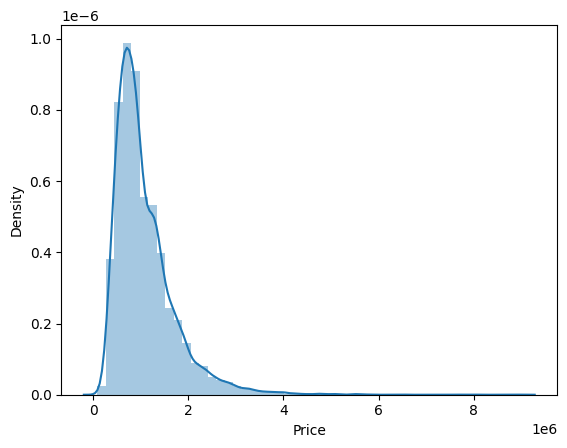

In [62]:
sns.distplot(df['Price'])

Предварительно удалим очевидно избыточные и ненужные для данной задачи признаки:

Признак Address имеет избыточную информацию (13580 разных адресов), которую вполне может нести признак Suburb, вместо того чтобы смотреть на каждое конкретное здание, модель будет ориентироваться на район или застройку из домов, которые можно выделить как благополучные или нет и т.д.

Признак Method: не имеет значение каким способом был приобретена недвижимость будь то аукцион, продажа имущества или подробности сделки скрыты, если задача касается оценки её цены. Важны внутренние и внешние факторы, касающиеся недвижимости, а не детали процедуры покупки.

Из похожих рассуждений стоит удалить признаки SellerG, Postcode, CouncilArea, Lattitude, Longtitude

Но признаки SellerG и Method ещё пригодяться для анализа, поэтому удалим их позже

In [63]:
df.drop(['Postcode','CouncilArea','Lattitude','Longtitude','Address'], axis=1, inplace=True)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,26/08/2017,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0
13576,Williamstown,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0
13577,Williamstown,3,h,1170000.0,S,Raine,26/08/2017,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0
13578,Williamstown,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0


Рассмотрим признак Date

Для этого создадим признак Dataperiod, разделив всё время на периоды по полгода и посмотрим на среднюю цену недвижимости

In [64]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [65]:
earliest_date = df['Date'].min()
latest_date = df['Date'].max()
iter = 0

df['Dataperiod'] = 0
while earliest_date < latest_date:
  df.loc[(df['Date'] >= earliest_date) & (df['Date'] < earliest_date + pd.DateOffset(months=6)), 'Dataperiod'] = iter
  iter = iter + 1
  earliest_date = earliest_date + pd.DateOffset(months=6)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,2017-08-26,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,h,1170000.0,S,Raine,2017-08-26,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0,3


In [66]:
df['Dataperiod'].value_counts()

,count
Dataperiod,
2,5149
1,4085
0,2251
3,2095


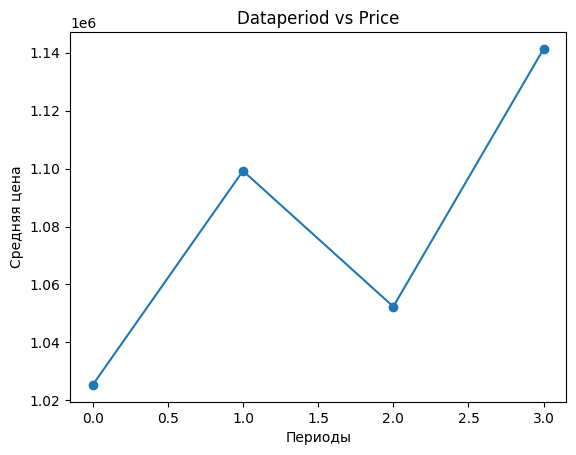

In [67]:
Price_mean = np.array(df.groupby(['Dataperiod'])['Price'].mean())
Periods_nums = np.arange(iter)

plt.plot(Periods_nums, Price_mean, marker='o')

plt.title("Dataperiod vs Price")
plt.xlabel("Периоды")
plt.ylabel("Средняя цена")

plt.show()

Можно заметить что тенденция с течением времени идёт на рост цен

Несмотря на то, что в датасете всего 4 периода (2 неполных года), можно сделать следующие выводы

В 0 период было куплено всего 2251 объект недвижимости, после роста цен на 10% в следующем периоде было куплено 4085 объектов, это можно объяснить, что люди начали экстренно скупать недвижимость, опасаясь дальнейшего роста. В период самых низких цен было куплено больше всего объектов, а когда цена пробила новый потолок, то объектов было куплено меньше всего.

По итогу этот признак можно посчитать полезным чтобы качественно предсказывать цены

Оставим новый созданный признак Dataperiod и удалим признак Date



In [68]:
df.drop(['Date'], axis=1, inplace=True)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0,3


Просто удалим 62 записи, которые содержат Nan значения в признаке Car, которые составляют 0,46 процентов от всех записей

In [69]:
index_value = df.index[df['Car'].isnull()].tolist()

In [70]:
df.drop(index_value, inplace=True)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0,3


Поробуем заполнить другие пропущенные значения в признаках BuildingArea и YearBuilt

Предпопологаю, что BuildingArea может зависить от Room, Bedroom2, Bathroom, Type

Но перед этим трансформируем признак Type из строки в число

In [71]:
df['Type'].value_counts()

,count
Type,
h,9389
u,3015
t,1114


In [72]:
df['Type'].replace(['h', 'u', 't'], [0, 1, 2], inplace=True)

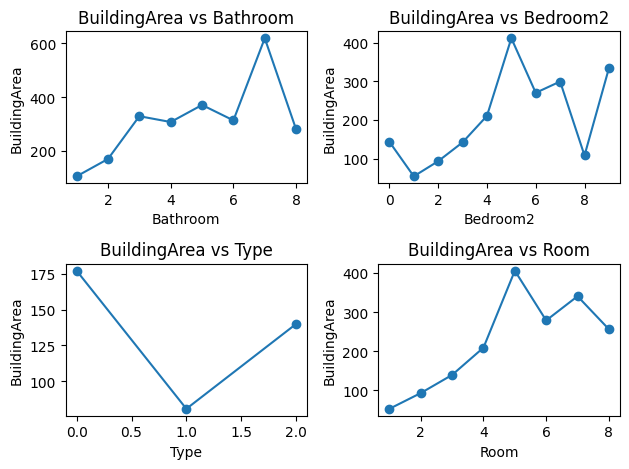

In [73]:
BuildingArea_mean_Bathroom = np.array(df.groupby(['Bathroom'])['BuildingArea'].mean())
Bathroom_nums = np.sort(np.array(df['Bathroom'].unique()))

BuildingArea_mean_Bedroom2 = np.array(df.groupby(['Bedroom2'])['BuildingArea'].mean())
Bedroom2_nums = np.sort(np.array(df['Bedroom2'].unique()))

BuildingArea_mean_Type = np.array(df.groupby(['Type'])['BuildingArea'].mean())
Type_nums = np.sort(np.array(df['Type'].unique()))

BuildingArea_mean_Room = np.array(df.groupby(['Rooms'])['BuildingArea'].mean())
Room_nums = np.sort(np.array(df['Rooms'].unique()))

plt.subplot(2, 2, 1)
plt.plot(Bathroom_nums, BuildingArea_mean_Bathroom, marker='o')
plt.xlabel("Bathroom")
plt.ylabel("BuildingArea")
plt.title('BuildingArea vs Bathroom')

plt.subplot(2, 2, 2)
plt.plot(Bedroom2_nums, BuildingArea_mean_Bedroom2, marker='o')
plt.xlabel("Bedroom2")
plt.ylabel("BuildingArea")
plt.title('BuildingArea vs Bedroom2')

plt.subplot(2, 2, 3)
plt.plot(Type_nums, BuildingArea_mean_Type, marker='o')
plt.xlabel("Type")
plt.ylabel("BuildingArea")
plt.title('BuildingArea vs Type')

plt.subplot(2, 2, 4)
plt.plot(Room_nums, BuildingArea_mean_Room, marker='o')
plt.xlabel("Room")
plt.ylabel("BuildingArea")
plt.title('BuildingArea vs Room')

plt.tight_layout()
plt.show()

По графикам можно сделать вывод, что существует некоторая зависимость от количества ванных комнат и просто комнат

И очень слабая и неявная от количества спален

Но есть объяснимая зависимость от типа здания

Если здание h (дом, коттедж, вилла), то его средняя площадь 175, если здания типа u (блок, дуплекс), то его средняя площадь меньше 100, а если здание типа t (таунхаус), то его средняя площадь равна 140.

In [74]:
df['Bathroom'].value_counts()

,count
Bathroom,
1.0,7467
2.0,4958
3.0,916
4.0,106
0.0,34
5.0,28
6.0,5
7.0,2
8.0,2


In [75]:
df['Rooms'].value_counts()

,count
Rooms,
3,5852
2,3622
4,2684
1,678
5,596
6,67
7,10
8,8
10,1


У нас есть данные с количесвом Bathroom 6, 7 и 8

Таких объектов 5+2+2 = 9

И так же один объект с количеством Rooms 10

Просто избавимся от них как от выбросов

И будем рассчитывать BuildingArea используя среднюю по трём величинам признаков Type, Bathroom и Rooms

In [76]:
ind = df[(df['Bathroom'] == 6) | (df['Bathroom'] == 7) | (df['Bathroom'] == 8)].index.tolist()
df.drop(ind, inplace=True)

ind = df[(df['Rooms'] == 10)].index.tolist()
df.drop(ind, inplace=True)

df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,0,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,0,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,0,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,0,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,0,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,0,1245000.0,S,Barry,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,0,1031000.0,SP,Williams,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,0,1170000.0,S,Raine,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,0,2500000.0,PI,Sweeney,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0,3


In [77]:
arr1 = df.groupby(['Bathroom'])['BuildingArea'].mean().tolist()
arr1

[nan,
 105.95004215012374,
 170.22971172685018,
 328.93718498233216,
 307.307972972973,
 370.515]

In [78]:
arr2 = df.groupby(['Rooms'])['BuildingArea'].mean().tolist()
arr2

[52.53959654178675,
 92.83187162891046,
 139.14018766519825,
 208.94118762886598,
 405.9865800578035,
 276.04285714285714,
 340.42333333333335,
 135.33333333333334]

In [79]:
arr1 = np.nan_to_num(arr1, nan=0)

In [80]:
for i in range(3):
  for j in range(6):
    for k in range(8):
      df.loc[(df['Type'] == i) & (df['Bathroom'] == j) & (df['Rooms'] == k),'BuildingArea'] = (BuildingArea_mean_Type[i] + arr1[j] + arr2[k])/3
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,0,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,140.774280,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,0,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,140.774280,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,0,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,185.467836,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,0,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,185.467836,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,0,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,229.723077,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,0,1245000.0,S,Barry,16.7,4.0,2.0,2.0,652.0,251.149634,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,0,1031000.0,SP,Williams,6.8,3.0,2.0,2.0,333.0,185.467836,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,0,1170000.0,S,Raine,6.8,3.0,2.0,4.0,436.0,185.467836,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,0,2500000.0,PI,Sweeney,6.8,4.0,1.0,5.0,866.0,229.723077,1920.0,Western Metropolitan,6380.0,3


Для того чтобы заполнить признак YearBuilt нужно определиться влияет ли год постройки здания на Price

Для этого создадим новый признак Yearperiod по значениям 25%, 50%, 75% для признака YearBuilt

In [81]:
df.describe()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Dataperiod
count,13508.000000,13508.000000,1.350800e+04,13508.000000,13508.000000,13508.000000,13508.000000,13508.000000,13505.000000,8168.000000,13508.000000,13508.000000
mean,2.937741,0.388140,1.073768e+06,10.156818,2.913311,1.531833,1.608528,557.936038,175.376554,1964.900955,7455.330545,1.515472
std,0.951969,0.634395,6.372681e+05,5.861721,0.958821,0.679329,0.960303,3999.651482,53.320173,37.124844,4381.929526,0.940117
min,1.000000,0.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,57.856486,1196.000000,249.000000,0.000000
25%,2.000000,0.000000,6.500000e+05,6.200000,2.000000,1.000000,1.000000,178.000000,140.774280,1940.000000,4380.000000,1.000000
50%,3.000000,0.000000,9.007500e+05,9.200000,3.000000,1.000000,2.000000,442.000000,164.041280,1970.000000,6567.000000,2.000000
75%,3.000000,1.000000,1.327125e+06,13.000000,3.000000,2.000000,2.000000,651.000000,207.835059,1999.000000,10331.000000,2.000000
max,8.000000,2.000000,9.000000e+06,48.100000,20.000000,5.000000,10.000000,433014.000000,317.911396,2018.000000,21650.000000,3.000000


In [82]:
df['Yearperiod'] = np.NaN
df.loc[(df['YearBuilt'] <= 1940),'Yearperiod'] = 0
df.loc[(df['YearBuilt'] > 1940) & (df['YearBuilt'] <= 1970),'Yearperiod'] = 1
df.loc[(df['YearBuilt'] > 1970) & (df['YearBuilt'] <= 1999),'Yearperiod'] = 2
df.loc[df['YearBuilt'] > 1999,'Yearperiod'] = 3

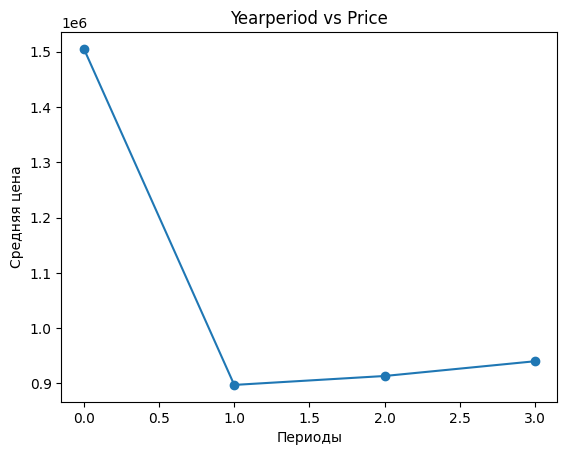

In [83]:
Price_mean = np.array(df.groupby(['Yearperiod'])['Price'].mean())
Periods_nums = np.arange(4)

plt.plot(Periods_nums, Price_mean, marker='o')

plt.title("Yearperiod vs Price")
plt.xlabel("Периоды")
plt.ylabel("Средняя цена")

plt.show()

Заметно, что здания построенные до 1940 года обладают стоимостью в два раза превышающюю современные здания, и дальше чем новее здание, тем дороже оно стоит.

Поэтому стоит попытаться заполнить этот признак

Предполагаю, что есть районы или пригорды, где эти здания преимуществно находяться

In [84]:
df[(df['Yearperiod'] == 0)]['Regionname'].value_counts()

,count
Regionname,
Southern Metropolitan,894
Northern Metropolitan,686
Western Metropolitan,410
Eastern Metropolitan,58
South-Eastern Metropolitan,7
Northern Victoria,2
Eastern Victoria,1


Больше всего старые здания находятся в SM, NM и WM

<Axes: xlabel='count', ylabel='Regionname'>

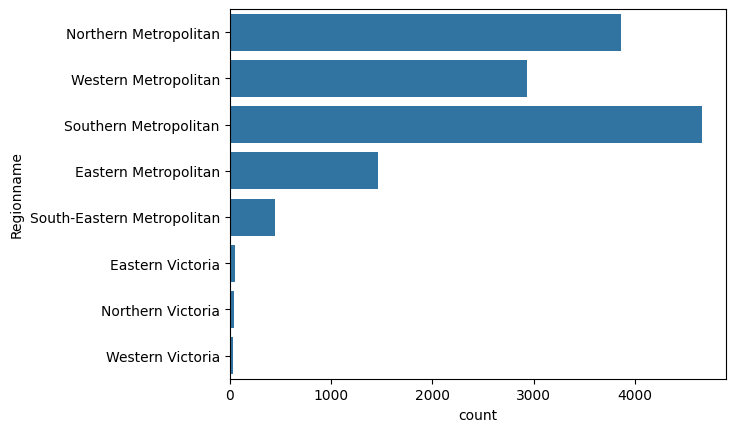

In [85]:
sns.countplot(df['Regionname'])

Но на самом деле в целом в этих районах было совершенно больше всего покупок


In [86]:
df2 = df[(df['Suburb'] == 'Brunswick') | (df['Suburb'] == 'Richmond') | (df['Suburb'] == 'Northcote') | (df['Suburb'] == 'Coburg')]

<Axes: xlabel='Yearperiod', ylabel='count'>

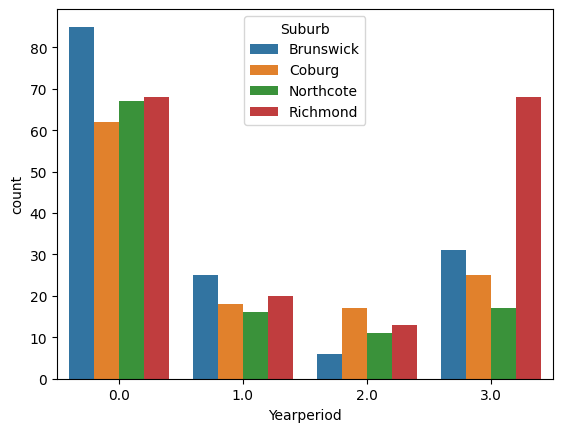

In [87]:
sns.countplot(x ='Yearperiod', hue='Suburb', data=df2)

Самый многочисленный по старым зданиям район, так же содержит и обычные здания в соотношении 50 на 50, то есть он является смешенным и нет ярко выделенного пригорода, где продавались только старые здания

Район или пригород выделить не получилось

Попробуем найти агента, который продавал больше всего старых зданий

In [88]:
df2 = df[(df['SellerG'] == 'Nelson') | (df['SellerG'] == 'Jellis') | (df['SellerG'] == 'Marshall') | (df['SellerG'] == 'hockingstuart')]

<Axes: xlabel='Yearperiod', ylabel='count'>

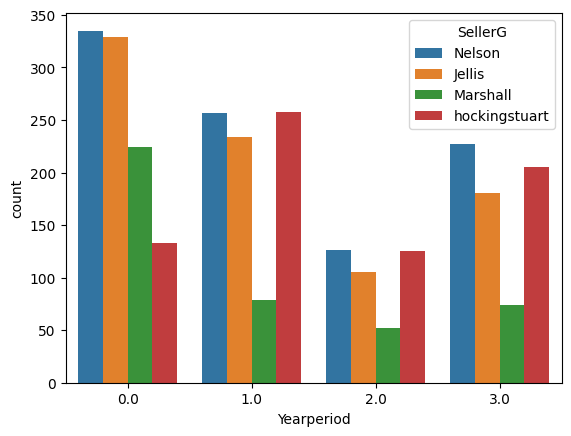

In [89]:
sns.countplot(x ='Yearperiod', hue='SellerG', data=df2)

Схожая ситуация, больше всего старых домов продавали агенты, которые в целом продали больше всех

Хотя агент Marshal и выделяется на фоне остальных агентов, но он не специализируется на продаже только старых зданий

Поверим методы продажи

<Axes: xlabel='Yearperiod', ylabel='count'>

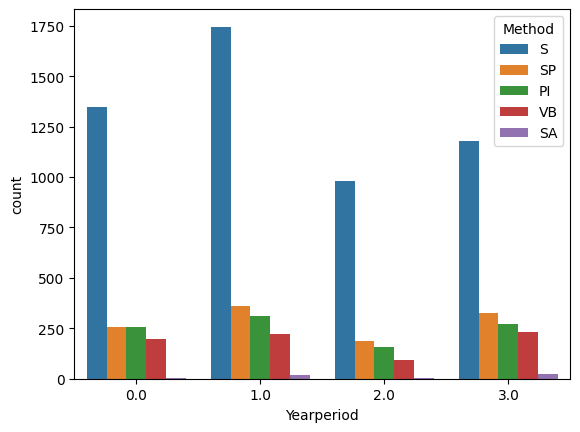

In [90]:
sns.countplot(x ='Yearperiod', hue='Method', data=df)

In [91]:
df['Yearperiod'].value_counts()

,count
Yearperiod,
1.0,2658
0.0,2058
3.0,2033
2.0,1419


Метод продажи ничего не даёт

Независимо от возраста здания все они продавались самым распрастранённым методом S

Идей для дальнейшего анализа не осталось. По этому есть три варианта решения:


*   Избавиться от строчек в которых пропущенно значение и тогда исчезнет полованиа датасета
*   Избавиться от признака YearBuilt
*   Либо заполнить пропущенные значения средним числом, что может помешать обучению и дать ложную информацию

Я решаю избавиться от признака, так как он в целом существенен только для старых зданий, процент которых составляет 25 от всего датасета, а оставшиеся 75% изменяются в цене от признака YearBuilt не так сильно

Так же удалим признаки, которые нам тоже уже не нужны SellerG, Method и созданный признак Yearperiod


In [92]:
df.drop(['SellerG','Method','Yearperiod','YearBuilt'], axis=1, inplace=True)
df

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,0,1480000.0,2.5,2.0,1.0,1.0,202.0,140.774280,Northern Metropolitan,4019.0,1
1,Abbotsford,2,0,1035000.0,2.5,2.0,1.0,0.0,156.0,140.774280,Northern Metropolitan,4019.0,0
2,Abbotsford,3,0,1465000.0,2.5,3.0,2.0,0.0,134.0,185.467836,Northern Metropolitan,4019.0,2
3,Abbotsford,3,0,850000.0,2.5,3.0,2.0,1.0,94.0,185.467836,Northern Metropolitan,4019.0,2
4,Abbotsford,4,0,1600000.0,2.5,3.0,1.0,2.0,120.0,229.723077,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,0,1245000.0,16.7,4.0,2.0,2.0,652.0,251.149634,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,0,1031000.0,6.8,3.0,2.0,2.0,333.0,185.467836,Western Metropolitan,6380.0,3
13577,Williamstown,3,0,1170000.0,6.8,3.0,2.0,4.0,436.0,185.467836,Western Metropolitan,6380.0,3
13578,Williamstown,4,0,2500000.0,6.8,4.0,1.0,5.0,866.0,229.723077,Western Metropolitan,6380.0,3


Рассмотрим матрицу корреляций

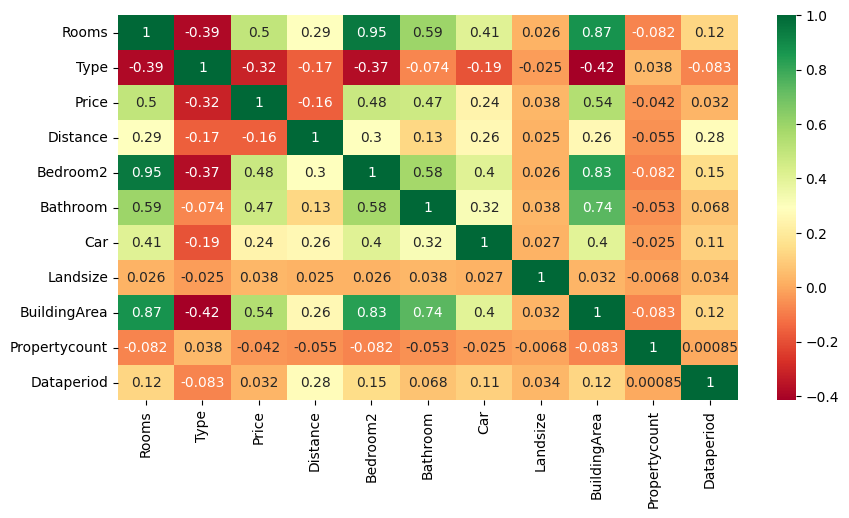

In [93]:
df_numeric = df.select_dtypes(include=[float, int])

sns.heatmap(df_numeric.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

У нас есть нецелевой признак, который очень сильно коллерируют с другими нецелевыми признаками, избавимся от него.

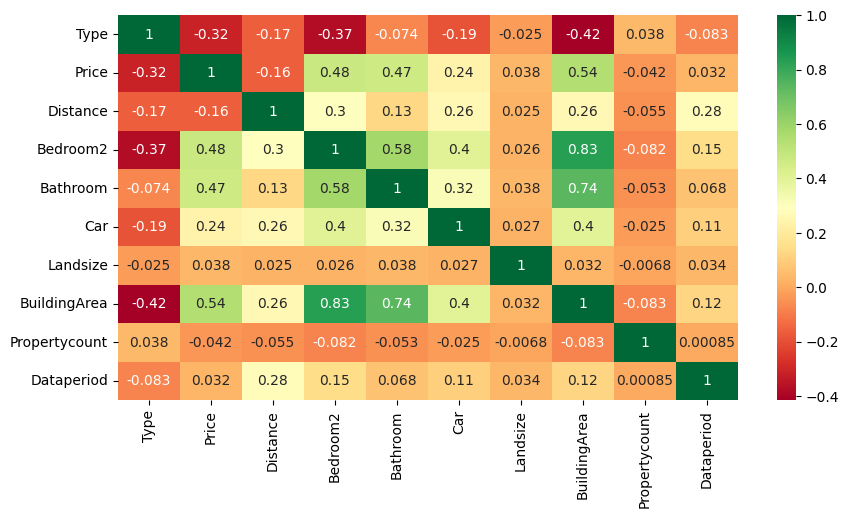

In [94]:
df.drop(['Rooms'], axis=1, inplace=True)

df_numeric = df.select_dtypes(include=[float, int])

sns.heatmap(df_numeric.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [95]:
df

,Suburb,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Regionname,Propertycount,Dataperiod
0,Abbotsford,0,1480000.0,2.5,2.0,1.0,1.0,202.0,140.774280,Northern Metropolitan,4019.0,1
1,Abbotsford,0,1035000.0,2.5,2.0,1.0,0.0,156.0,140.774280,Northern Metropolitan,4019.0,0
2,Abbotsford,0,1465000.0,2.5,3.0,2.0,0.0,134.0,185.467836,Northern Metropolitan,4019.0,2
3,Abbotsford,0,850000.0,2.5,3.0,2.0,1.0,94.0,185.467836,Northern Metropolitan,4019.0,2
4,Abbotsford,0,1600000.0,2.5,3.0,1.0,2.0,120.0,229.723077,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,0,1245000.0,16.7,4.0,2.0,2.0,652.0,251.149634,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,0,1031000.0,6.8,3.0,2.0,2.0,333.0,185.467836,Western Metropolitan,6380.0,3
13577,Williamstown,0,1170000.0,6.8,3.0,2.0,4.0,436.0,185.467836,Western Metropolitan,6380.0,3
13578,Williamstown,0,2500000.0,6.8,4.0,1.0,5.0,866.0,229.723077,Western Metropolitan,6380.0,3


In [96]:
df['Suburb'].value_counts()

,count
Suburb,
Reservoir,359
Richmond,259
Bentleigh East,249
Preston,238
Brunswick,221
...,...
Sandhurst,1
Bullengarook,1
Montrose,1


In [97]:
df['Regionname'].value_counts()

,count
Regionname,
Southern Metropolitan,4662
Northern Metropolitan,3866
Western Metropolitan,2938
Eastern Metropolitan,1468
South-Eastern Metropolitan,449
Eastern Victoria,53
Northern Victoria,40
Western Victoria,32


Эти признаки будет не рационально кодировать с помощью one-hot encoding так как размерность сильно увеличиться. Так же не хочетья кодировать с  помощью label encoding так как будет введена ложная порядковая связь между значениями признака.

Поэтому просто удалим эти признаки и будет обучать модель без них

In [98]:
df.drop(columns=['Suburb', 'Regionname'], axis=1, inplace=True)
df

,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Dataperiod
0,0,1480000.0,2.5,2.0,1.0,1.0,202.0,140.774280,4019.0,1
1,0,1035000.0,2.5,2.0,1.0,0.0,156.0,140.774280,4019.0,0
2,0,1465000.0,2.5,3.0,2.0,0.0,134.0,185.467836,4019.0,2
3,0,850000.0,2.5,3.0,2.0,1.0,94.0,185.467836,4019.0,2
4,0,1600000.0,2.5,3.0,1.0,2.0,120.0,229.723077,4019.0,0
...,...,...,...,...,...,...,...,...,...,...
13575,0,1245000.0,16.7,4.0,2.0,2.0,652.0,251.149634,7392.0,3
13576,0,1031000.0,6.8,3.0,2.0,2.0,333.0,185.467836,6380.0,3
13577,0,1170000.0,6.8,3.0,2.0,4.0,436.0,185.467836,6380.0,3
13578,0,2500000.0,6.8,4.0,1.0,5.0,866.0,229.723077,6380.0,3


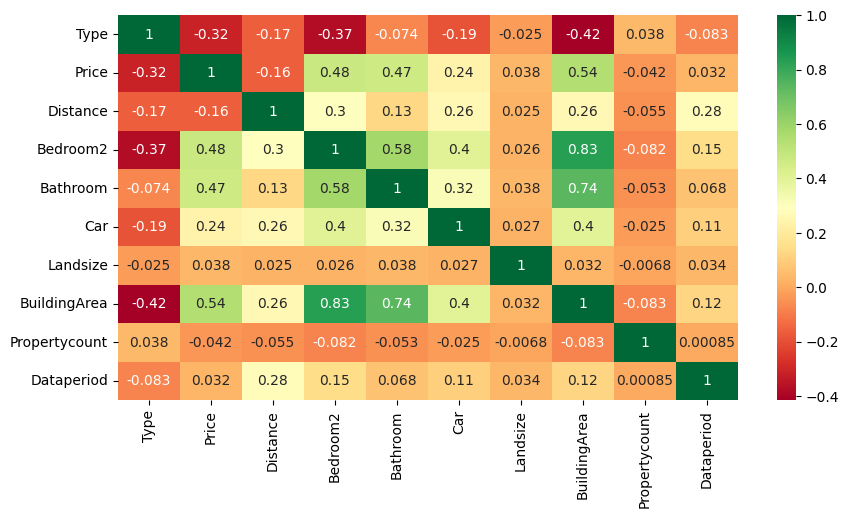

In [99]:
df_numeric = df.select_dtypes(include=[float, int])

sns.heatmap(df_numeric.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [100]:
df.dropna(axis=0, inplace=True)
df_copy = df

Разделим выборку на обучающую и тестовую

Масштабируем данные

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df_copy[['Price']]
X = df_copy.drop(columns=['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [102]:
X_train

array([[ 2.52957347, -0.45569179,  1.13073172, ...,  2.18833001,
        -0.22382847, -0.54916347],
       [-0.61633602, -0.14850563, -0.94355645, ..., -0.64218319,
        -1.56418796,  0.51352687],
       [-0.61633602, -0.55808718,  2.1678758 , ...,  1.60829523,
        -0.28087476, -0.54916347],
       ...,
       [-0.61633602, -1.29192079,  0.09358763, ...,  0.19625581,
         1.70821507, -1.61185381],
       [-0.61633602,  0.63652568,  0.09358763, ...,  1.02647212,
         0.80003823, -1.61185381],
       [-0.61633602, -0.3362305 ,  0.09358763, ...,  0.19625581,
        -0.54876411, -0.54916347]])

**Реализуем функцию gradient_descent(X, y) и функции для рассчёта метрик**

In [103]:
def my_mse(X, y, w):
  X = np.hstack((X, np.ones((X.shape[0], 1))))
  return np.mean((y - np.dot(X,w))**2)

def my_rmse(X, y, w):
  return np.sqrt(my_mse(X, y, w))

def my_r2(X, y, w):
  X = np.hstack((X, np.ones((X.shape[0], 1))))
  ss_total = np.sum((y - np.mean(y))**2)
  ss_residual = np.sum((y - np.dot(X,w))**2)
  return 1 - (ss_residual/ss_total)

In [104]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, lambda_reg=0.1):
    n_samples = X.shape[0]
    X = np.hstack((X, np.ones((X.shape[0], 1))))
    w = np.zeros(X.shape[1])

    for iteration in range(n_iterations):
        y_pred = np.dot(X, w)

        error = y_pred - y

        gradient = (2 / n_samples) * np.dot(X.T, error) + (2 * lambda_reg * w)

        w -= learning_rate * gradient

    return w

In [105]:
w = gradient_descent(X_train, y_train)

In [106]:
w

array([-108391.17301319, -201731.5259404 ,  107288.27302563,
        131451.06474625,   36123.08657594,   11890.20633233,
        133037.22606226,   -1721.4595453 ,   22904.00413037,
        972777.57823806])

Результаты на тренировочной выборке

In [107]:
my_mse(X_train, y_train, w)

235439354238.07242

In [108]:
my_rmse(X_train, y_train, w)

485220.9334293734

In [109]:
my_r2(X_train, y_train, w)

0.41585143202583874

Резульаты на тестовой выборке

In [110]:
my_mse(X_test, y_test, w)

250162139093.16028

In [111]:
my_rmse(X_test, y_test, w)

500162.11281259626

In [112]:
my_r2(X_test, y_test, w)

0.39406960375392985

Результаты для модели Ridge() из sklearn

In [113]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

ridge_model = Ridge(alpha=0.1, random_state=42, max_iter=1000)

ridge_model.fit(X_train, y_train)

y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = root_mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = root_mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R2: {train_r2:.4f}")

print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R2: {test_r2:.4f}")

print(f"Coefficients: {ridge_model.coef_}")

Train MSE: 225048999267.2784
Train RMSE: 474393.2960
Train R2: 0.4416
Test MSE: 239316810742.2808
Test RMSE: 489200.1745
Test R2: 0.4203
Coefficients: [-118935.78052238 -229712.29763931  112061.18390155  140780.51238937
   37428.0546455    12243.21746537  137002.13461155   -1521.45930607
   30235.14964315]


**Сравнение реализованной функции gradient_descent и модели Ridge() из sklearn**

Естественно библиотечная модель работает лучше

Если судить по результатам рассчитанных целевых метрик, то каждая из метрик (MSE, RMSE, R2) показала, что качество модели Ridge лучше, чем у реализованной функции. Если сравнивать по метрике R2, то точность реализованной функции на тестовых данных равна 0.394, а точность модели Ridge равна 0.420, что лучше на 0.026

Но в целом обе модели имеют одинаковую обобщающую способность



Используя кросс-валидацию создадим таблицу с метриками по каждому KFold и статистикой E, STD

In [115]:
from sklearn.model_selection import KFold

n_folds = 5

kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

metrics = {
        'mse-train': [], 'mse-test': [],
        'rmse-train': [], 'rmse-test': [],
        'r2-train': [], 'r2-test': []
    }

for train_idx, test_idx in kf.split(X):

  X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)

  X_test = scaler.transform(X_test)

  y_train = y_train.values.ravel()
  y_test = y_test.values.ravel()

  w = gradient_descent(X_train, y_train)

  mse_train = my_mse(X_train, y_train, w)
  mse_test = my_mse(X_test, y_test, w)

  rmse_train = my_rmse(X_train, y_train, w)
  rmse_test = my_rmse(X_test, y_test, w)

  r2_train = my_r2(X_train, y_train, w)
  r2_test = my_r2(X_test, y_test, w)

  metrics['mse-train'].append(mse_train)
  metrics['mse-test'].append(mse_test)
  metrics['rmse-train'].append(rmse_train)
  metrics['rmse-test'].append(rmse_test)
  metrics['r2-train'].append(r2_train)
  metrics['r2-test'].append(r2_test)

results = pd.DataFrame(metrics, index=[f'Fold{i+1}' for i in range(n_folds)])
results.loc['E'] = results.mean()
results.loc['STD'] = results.std()

results

,mse-train,mse-test,rmse-train,rmse-test,r2-train,r2-test
Fold1,2.365305e+11,2.520631e+11,486343.964476,502058.867526,0.414584,0.391024
Fold2,2.417568e+11,2.320140e+11,491687.710207,481678.356482,0.408029,0.414869
Fold3,2.393442e+11,2.419460e+11,489228.158099,491880.047989,0.408733,0.411155
Fold4,2.373554e+11,2.493559e+11,487191.309992,499355.521400,0.409785,0.408305
Fold5,2.430933e+11,2.283427e+11,493044.949719,477852.212198,0.408114,0.410338
E,2.396160e+11,2.407444e+11,489499.218499,490565.001119,0.409849,0.407138
STD,2.505184e+09,9.313817e+09,2558.016779,9504.725300,0.002449,0.008333


**Выводы по таблице**

Средние значения метрик MSE и RMSE по train и test не сильно отличаются, что говорит об отсутствии переобучения.

Средние значения R2 для train и test данных приблизительно равны 0.41, что говорит о том что модель объясняет около 40% дисперсии данных.

Стандартное отклонение для R2 очень низкое, что говорит о высокой согласованности между фолдами.

Стандартные отклонения для RMSE и MSE небольшие относительно самих значений метрик, что указывает на стабильность при разных разбиениях выборки.

Качество модели получилось неудовлетворяющим,так как значение R2 равное 0.41 является недостаточным для практических целей. Возможно, линейная регрессия плохо подходит для данного набора данных.